<a href="https://colab.research.google.com/github/sreya-rc/TF2.0/blob/main/TF2_0_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow
try:
  %tensorflow_version 2.x # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [ ]:
# Additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()    # targets are 2-D arrays, (N x 1) instead of N
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()         # TensorFlow expects 1-D array as targets
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [ ]:
# Number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
# Note: make sure you use the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 21s 6ms/step - loss: 1.5647 - accuracy: 0.4250 - val_loss: 1.2815 - val_accuracy: 0.5359
Epoch 2/15
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2781 - accuracy: 0.5408 - val_loss: 1.1716 - val_accuracy: 0.5850
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1488 - accuracy: 0.5897 - val_loss: 1.1226 - val_accuracy: 0.5930
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0580 - accuracy: 0.6209 - val_loss: 1.0141 - val_accuracy: 0.6340
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9819 - accuracy: 0.6515 - val_loss: 0.9484 - val_accuracy: 0.6597
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9385 - accuracy: 0.6685 - val_loss: 0.9059 - val_accuracy: 0.6876
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8824 - accuracy: 0.6866 - val_loss: 0.8901 - val_accuracy

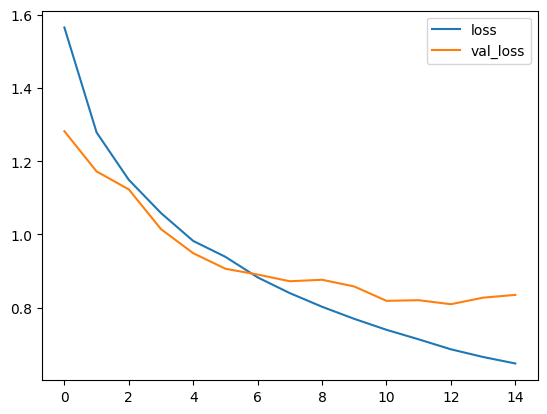

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

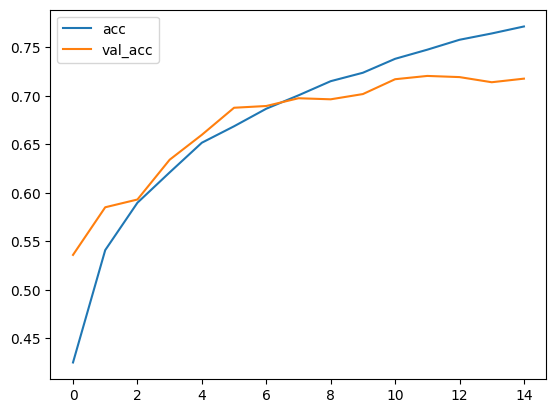

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 4ms/step
Confusion matrix, without normalization
[[792  20  17  12  18   1   6  10  91  33]
 [ 13 855   2   2   5   1  12   2  23  85]
 [ 87  10 543  46 129  43  77  27  20  18]
 [ 29  15  68 465  92 116 125  39  22  29]
 [ 32   5  43  34 725  17  70  53  11  10]
 [ 18   8  52 188  63 511  64  65  13  18]
 [  5   8  23  35  37   7 860   5  12   8]
 [ 17   8  23  31  69  34  19 764   7  28]
 [ 67  24   8  12   4   4   8   0 850  23]
 [ 33  83   7   6   5   5   8  15  27 811]]


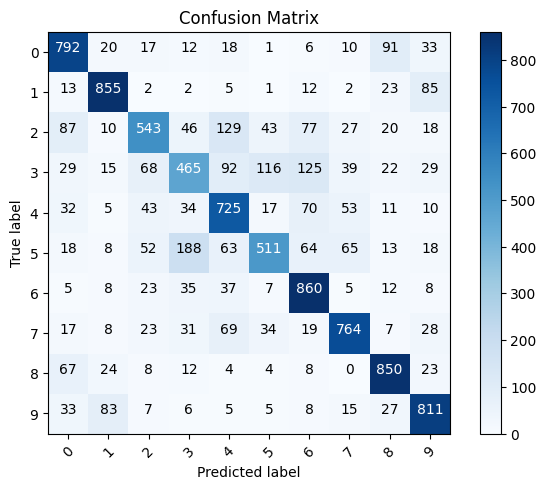

In [ ]:
# Plot confusion matrix

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

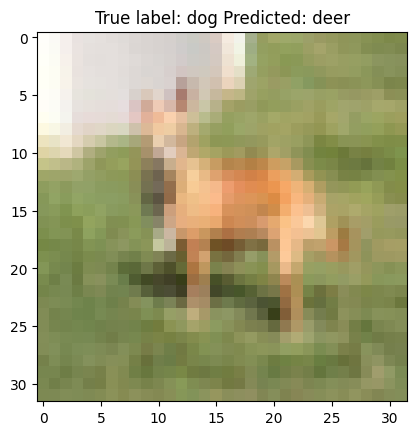

In [ ]:
# Show some misclassified samples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));   # Show true label vs. what it was mistaken as